<a href="https://colab.research.google.com/github/WellFan/machinelearning_2023_final/blob/main/html2023_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGboost with classification and regression

# Data Preprocessing


## Import packages and data

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [30]:
from google.colab import drive
drive.mount('/content/drive')
url = '/content/drive/MyDrive/Colab Notebooks/html2023-spring-final-project/'
df = pd.read_csv(url + 'train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data statistics

In [31]:
df.head()

Danceability    Energy  Key  Loudness  Speechiness  Acousticness  \
0           0.0  0.000273  3.0   -25.176       0.0443      0.724151   
1           0.0  0.184220  7.0       NaN          NaN      0.672221   
2           0.0       NaN  6.0   -15.596          NaN      0.667628   
3           1.0  0.209585  NaN    -6.251       0.0277      0.003796   
4           4.0       NaN  5.0       NaN       0.0260      0.000003   

   Instrumentalness  Liveness  Valence    Tempo  ...  \
0          0.000062  0.000807    0.340   83.398  ...   
1          0.910000  0.034966    0.746  148.692  ...   
2          0.867000  0.001772    0.380   84.899  ...   
3               NaN  0.001000      NaN  150.220  ...   
4          0.000467  0.002924    0.295   97.997  ...   

                               Album                                   Uri  \
0  Sinkovsky Plays and Sings Vivaldi  spotify:track:7njAZhca4o80qQdCgyEWya   
1                                NaN  spotify:track:2nnXe7n3Vivs7OfQKRsfWD   
2          Vivaldi: The Four Seasons  spotify:track:0VQMAup2VdeQWLCvM14Uz2   
3                   Life Thru A Lens  spotify:track:1M2nd8jNUkkwrc1dgBPTJz   
4                         Escapology  spotify:track:2Ms33RTRCT6gArrpcrPxmo   

                                         Url_spotify  \
0  https://open.spotify.com/artist/2QOIawHpSlOwXD...   
1  https://open.spotify.com/artist/2QOIawHpSlOwXD...   
2  https://open.spotify.com/artist/2QOIawHpSlOwXD...   
3  https://open.spotify.com/artist/2HcwFjNelS49kF...   
4  https://open.spotify.com/artist/2HcwFjNelS49kF...   

                                   Url_youtube Comments  \
0  https://www.youtube.com/watch?v=NzCL9uLkQSI   3070.0   
1  https://www.youtube.com/watch?v=jAnzlpPuIDU    122.0   
2  https://www.youtube.com/watch?v=jAnzlpPuIDU    122.0   
3  https://www.youtube.com/watch?v=luwAMFcc2f8  24350.0   
4  https://www.youtube.com/watch?v=iy4mXZN1Zzk  31150.0   

                                         Description  \
0  Antonio Vivaldi's 4th Concerto - From his Most...   
1  A. Vivaldi Concerto No. 2 in G minor, RV 315, ...   
2  A. Vivaldi Concerto No. 2 in G minor, RV 315, ...   
3  25 years of Life Thru A Lens. Pre-order the br...   
4  25 years of Life Thru A Lens. Pre-order the br...   

                                               Title             Channel  \
0  Antonio Vivaldi - Concerto No.4 in F minor, Op...         Mozafunkula   
1  A. Vivaldi Concerto No. 2 in G minor, RV 315, ...        Anton Paisov   
2                                                NaN        Anton Paisov   
3                           Robbie Williams - Angels  robbiewilliamsvevo   
4                             Robbie Williams - Feel  robbiewilliamsvevo   

            Composer             Artist  
0                NaN         Marshmello  
1  Finneas O'Connell           Bon Iver  
2  Finneas O'Connell  Kamasi Washington  
3         Louis Bell              Drake  
4            Juicy J        Alicia Keys  

[5 rows x 29 columns]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17170 entries, 0 to 17169
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Danceability      17170 non-null  float64
 1   Energy            14615 non-null  float64
 2   Key               14568 non-null  float64
 3   Loudness          14601 non-null  float64
 4   Speechiness       14655 non-null  float64
 5   Acousticness      14593 non-null  float64
 6   Instrumentalness  14569 non-null  float64
 7   Liveness          14635 non-null  float64
 8   Valence           14596 non-null  float64
 9   Tempo             14608 non-null  float64
 10  Duration_ms       14567 non-null  float64
 11  Views             14574 non-null  float64
 12  Likes             14591 non-null  float64
 13  Stream            14602 non-null  float64
 14  Album_type        14610 non-null  object 
 15  Licensed          14577 non-null  object 
 16  official_video    14555 non-null  object

In [33]:
df.describe()

Danceability        Energy           Key      Loudness   Speechiness  \
count  17170.000000  1.461500e+04  14568.000000  14601.000000  14655.000000   
mean       4.586022  3.358392e-01      5.231604     -7.561370      0.095462   
std        2.858980  2.426825e-01      3.456986      4.540944      0.103068   
min        0.000000  8.365427e-15      0.000000    -46.251000      0.000000   
25%        2.000000  1.342177e-01      2.000000     -8.655000      0.036100   
50%        5.000000  2.954083e-01      5.000000     -6.472000      0.051400   
75%        7.000000  5.062616e-01      8.000000     -4.920000      0.106000   
max        9.000000  1.000000e+00     10.000000      0.829000      0.964000   

       Acousticness  Instrumentalness      Liveness       Valence  \
count  1.459300e+04      14569.000000  14635.000000  14596.000000   
mean   1.148404e-01          0.054934      0.033745      0.525842   
std    2.215160e-01          0.191392      0.114862      0.244912   
min    1.367631e-18          0.000000      0.000003      0.000000   
25%    9.797218e-05          0.000000      0.000836      0.336000   
50%    6.967871e-03          0.000002      0.001907      0.531000   
75%    1.025032e-01          0.000392      0.012487      0.722000   
max    9.880479e-01          1.000000      1.000000      0.993000   

              Tempo   Duration_ms         Views         Likes        Stream  \
count  14608.000000  1.456700e+04  1.457400e+04  1.459100e+04  1.460200e+04   
mean     120.937819  2.228307e+05  8.791096e+07  6.485064e+05  1.290426e+08   
std       29.665225  1.211659e+05  2.523918e+08  1.726157e+06  2.417681e+08   
min        0.000000  3.098500e+04  2.600000e+01  0.000000e+00  6.574000e+03   
25%       97.041000  1.793055e+05  1.971684e+06  2.251600e+04  1.628195e+07   
50%      119.995500  2.120300e+05  1.427208e+07  1.239210e+05  4.550224e+07   
75%      139.990250  2.495115e+05  6.603988e+07  5.077155e+05  1.256493e+08   
max      243.372000  4.581483e+06  5.773798e+09  4.014762e+07  3.386520e+09   

                 id      Comments  
count  17170.000000  1.458900e+04  
mean    8584.500000  2.810321e+04  
std     4956.696396  2.142922e+05  
min        0.000000  0.000000e+00  
25%     4292.250000  5.340000e+02  
50%     8584.500000  3.171000e+03  
75%    12876.750000  1.361900e+04  
max    17169.000000  1.608314e+07

## Detect outlier
We investigate the following video with
1. Valence = 0
2. Like = 0
3. Instrumentalness = 1
4. Tempo = 0
5. Duration > $10^6$ ms

Except the 'duration' and 'like', the outliers of remaining features are abnormal 
but useful for classfication(danceability = 0).

In [34]:
df[df.Duration_ms>1e6]

Danceability    Energy  Key  Loudness  Speechiness  Acousticness  \
701             2.0       NaN  7.0    -4.501       0.0794           NaN   
2071            7.0  0.101195  3.0       NaN       0.0417      0.393833   
2478            2.0  0.586376  7.0    -4.501       0.0794      0.000209   
2797            2.0  0.493039  NaN    -4.342       0.0503      0.012167   
2927            8.0  0.300763  6.0   -14.259       0.1770      0.000044   
2929            9.0       NaN  1.0   -11.922       0.0949      0.000017   
3361            2.0  0.493039  NaN       NaN       0.0503      0.012167   
4743            2.0  0.586376  7.0    -4.501          NaN      0.000209   
6541            0.0  0.985075  1.0   -17.379       0.0612      0.809558   
7001            2.0  0.586376  7.0    -4.501       0.0794      0.000209   
11137           2.0  0.586376  7.0    -4.501       0.0794      0.000209   
12658           2.0  0.586376  7.0    -4.501       0.0794           NaN   

       Instrumentalness  Liveness  Valence    Tempo  ...  \
701            0.000013  0.003870    0.480  106.001  ...   
2071           0.000002  0.000921    0.812  137.159  ...   
2478           0.000013  0.003870      NaN      NaN  ...   
2797           0.000040  0.009528    0.868      NaN  ...   
2927                NaN  0.003242    0.903  102.336  ...   
2929           0.000055  0.010794    0.653  106.834  ...   
3361           0.000040  0.009528    0.868   97.512  ...   
4743           0.000013  0.003870    0.480  106.001  ...   
6541           0.562000  0.029791      NaN   84.788  ...   
7001                NaN  0.003870    0.480  106.001  ...   
11137               NaN  0.003870    0.480  106.001  ...   
12658               NaN  0.003870      NaN  106.001  ...   

                                                   Album  \
701                      52 Non Stop Dilbar Dilbar Remix   
2071                                      Gayatri Mantra   
2478                     52 Non Stop Dilbar Dilbar Remix   
2797   Hitazos: Amores Como el Nuestro / Que Fue / Al...   
2927                            Playero 37 "Underground"   
2929                            Playero 38 "Underground"   
3361   Hitazos: Amores Como el Nuestro / Que Fue / Al...   
4743                     52 Non Stop Dilbar Dilbar Remix   
6541                                         Ocean Waves   
7001                     52 Non Stop Dilbar Dilbar Remix   
11137                    52 Non Stop Dilbar Dilbar Remix   
12658                    52 Non Stop Dilbar Dilbar Remix   

                                        Uri  \
701    spotify:track:1FSYDJAlyHAabWhiGgYfDq   
2071   spotify:track:3oj9ZcytkTaovswquxjzo1   
2478   spotify:track:1FSYDJAlyHAabWhiGgYfDq   
2797   spotify:track:2ZixSR7OKIpdPUk4dwOekn   
2927   spotify:track:6ZbWeRhL76RXghqoMNF932   
2929   spotify:track:5EVCuT4L4hsyDtA7H1yByW   
3361   spotify:track:2ZixSR7OKIpdPUk4dwOekn   
4743                                    NaN   
6541   spotify:track:1saXdvEAafdRzUphXBzSHg   
7001                                    NaN   
11137                                   NaN   
12658                                   NaN   

                                             Url_spotify  \
701    https://open.spotify.com/artist/5rQoBDKFnd1n6B...   
2071   https://open.spotify.com/artist/4hkB2bR5ek6lJC...   
2478   https://open.spotify.com/artist/5T2I75UlGBcWd5...   
2797   https://open.spotify.com/artist/2Htm0q72SjGSms...   
2927                                                 NaN   
2929                                                 NaN   
3361   https://open.spotify.com/artist/2Mu8h5sFkOziL0...   
4743   https://open.spotify.com/artist/0NErdIJtuKBjtx...   
6541   https://open.spotify.com/artist/2CgVSpL4tfbUuH...   
7001   https://open.spotify.com/artist/0T1CMVkqffHlqE...   
11137                                                NaN   
12658  https://open.spotify.com/artist/0E02VcvA5p1ndk...   

                                       Url_youtube Comments  \
701    https:

In [35]:
df[df.Instrumentalness==1]

Danceability        Energy   Key  Loudness  Speechiness  Acousticness  \
10666           0.0  4.000169e-08   NaN   -28.460          0.0      0.494914   
10667           0.0  1.953125e-09   1.0   -27.592          0.0      0.748613   
10668           0.0  1.663750e-13  10.0   -21.995          0.0      0.781230   
10670           0.0  1.953125e-09   1.0       NaN          0.0      0.748613   
12328           0.0  1.953125e-09   NaN   -27.592          0.0      0.748613   
12334           0.0  1.663750e-13  10.0   -21.995          0.0      0.781230   

       Instrumentalness  Liveness  Valence  Tempo  ...  \
10666               1.0  0.001368      0.0    0.0  ...   
10667               1.0  0.001368      0.0    0.0  ...   
10668               1.0  0.001482      0.0    NaN  ...   
10670               1.0       NaN      NaN    NaN  ...   
12328               1.0  0.001368      0.0    0.0  ...   
12334               1.0       NaN      0.0    0.0  ...   

                                                   Album  \
10666  Best White Noise for Baby Sleep - Loopable wit...   
10667  Best White Noise for Baby Sleep - Loopable wit...   
10668  Best White Noise for Baby Sleep - Loopable wit...   
10670                                        White Noise   
12328  Best White Noise for Baby Sleep - Loopable wit...   
12334  Best White Noise for Baby Sleep - Loopable wit...   

                                        Uri  \
10666  spotify:track:2bRKxuH1o7pTmb1y4GfdEc   
10667  spotify:track:5I21rMWLtCjWQl6QyLn85W   
10668  spotify:track:4f9s3wr1e1QdpMDxQosSTz   
10670                                   NaN   
12328  spotify:track:5I21rMWLtCjWQl6QyLn85W   
12334  spotify:track:4f9s3wr1e1QdpMDxQosSTz   

                                             Url_spotify  \
10666  https://open.spotify.com/artist/4ZfEELHfyKd4od...   
10667  https://open.spotify.com/artist/4ZfEELHfyKd4od...   
10668  https://open.spotify.com/artist/4ZfEELHfyKd4od...   
10670  https://open.spotify.com/artist/4ZfEELHfyKd4od...   
12328                                                NaN   
12334  https://open.spotify.com/artist/4W12lEvVl5wect...   

                                       Url_youtube Comments  \
10666                                          NaN      NaN   
10667  https://www.youtube.com/watch?v=snlA7rFR0iQ    597.0   
10668  https://www.youtube.com/watch?v=gUkNfU0z9ts      0.0   
10670  https://www.youtube.com/watch?v=nMfPqeZjc2c  30861.0   
12328  https://www.youtube.com/watch?v=1hSNJvE4c70      0.0   
12334                                          NaN      0.0   

                                             Description  \
10666  Provided to YouTube by Symphonic Distribution\...   
10667  Brown noise can help you relax and get some sl...   
10668                                                NaN   
10670  By popular request, here is one of our most so...   
12328  Provided to YouTube by TuneCore\n\nBaby Sleep ...   
12334  Provided to YouTube by Symphonic Distribution\...   

                                                   Title  \
10666          Clean White Noise - Loopable With No Fade   
10667   Brown Noise, Black Screen 🟤⬛ • 12 hours • No ads   
10668            Air Conditioner - Loopable With No Fade   
10670  White Noise Black Screen | Sleep, Study, Focus...   
12328                             Baby Sleep Brown Noise   
12334            Air Conditioner - Loopable With No Fade   

                    Channel           Composer            Artist  
10666                   NaN  Finneas O'Connell         Daft Punk  
10667           DJ Grossman  Finneas O'Connell  The Chainsmokers  
10668   White Noise - Topic  Finneas O'Connell       Alicia Keys  
10670  Relaxing White Noise  Finneas O'Connell          Bon Iver  
12328    littleONES - Topic  Finneas O'Connell             Lizzo  
12334   White Noise - Topic  Finneas O'Connell             Drake  

[6 rows x 29 columns]

In [36]:
df[df.Tempo == 0]

Danceability        Energy   Key  Loudness  Speechiness  Acousticness  \
633             0.0           NaN   1.0    -7.977          0.0  7.251171e-08   
4559            0.0  6.496481e-02   NaN       NaN          0.0  9.183300e-01   
5628            0.0  1.157625e-03   7.0   -13.925          0.0  9.673617e-01   
6453            0.0  4.743793e-05   0.0   -22.519          0.0  9.821078e-01   
6531            0.0  1.600301e-11   9.0   -17.746          0.0  8.519714e-07   
6539            0.0  1.600301e-11   NaN   -17.746          0.0  8.519714e-07   
10666           0.0  4.000169e-08   NaN   -28.460          0.0  4.949137e-01   
10667           0.0  1.953125e-09   1.0   -27.592          0.0  7.486133e-01   
10669           0.0  1.581325e-02   2.0   -25.004          0.0  1.685159e-03   
12326           0.0  4.000169e-08   8.0   -28.460          0.0  4.949137e-01   
12328           0.0  1.953125e-09   NaN   -27.592          0.0  7.486133e-01   
12333           0.0  5.189512e-02   NaN   -16.469          0.0  3.581577e-03   
12334           0.0  1.663750e-13  10.0   -21.995          0.0  7.812300e-01   

       Instrumentalness  Liveness  Valence  Tempo  ...  \
633               0.878  0.219256      NaN    0.0  ...   
4559                NaN  0.721734      0.0    0.0  ...   
5628                NaN  0.001260      0.0    0.0  ...   
6453              0.940  0.000879      0.0    0.0  ...   
6531              0.877  0.523607      0.0    0.0  ...   
6539              0.877  0.523607      0.0    0.0  ...   
10666             1.000  0.001368      0.0    0.0  ...   
10667             1.000  0.001368      0.0    0.0  ...   
10669               NaN       NaN      0.0    0.0  ...   
12326               NaN  0.001368      0.0    0.0  ...   
12328             1.000  0.001368      0.0    0.0  ...   
12333             0.999  0.382657      0.0    0.0  ...   
12334             1.000       NaN      0.0    0.0  ...   

                                                   Album  \
633                                        Israeli Salad   
4559         The Three Tenors - The Best of the 3 Tenors   
5628                                   You And The Night   
6453                                                 NaN   
6531   Soothing Brown Noise Waves and Calming Ambient...   
6539   Soothing Brown Noise Waves and Calming Ambient...   
10666  Best White Noise for Baby Sleep - Loopable wit...   
10667  Best White Noise for Baby Sleep - Loopable wit...   
10669                                        White Noise   
12326  Best White Noise for Baby Sleep - Loopable wit...   
12328  Best White Noise for Baby Sleep - Loopable wit...   
12333                                                NaN   
12334  Best White Noise for Baby Sleep - Loopable wit...   

                                        Uri  \
633    spotify:track:6quMGNh47CpSR5kmZSYSTK   
4559   spotify:track:4mZlQk9Ha7WwJZUngARQeY   
5628                                    NaN   
6453   spotify:track:59gg6zQhSKGVnkT3hWAY3l   
6531   spotify:track:0tIkLggEJ9QriD7KFz1GGA   
6539   spotify:track:0tIkLggEJ9QriD7KFz1GGA   
10666  spotify:track:2bRKxuH1o7pTmb1y4GfdEc   
10667  spotify:track:5I21rMWLtCjWQl6QyLn85W   
10669  spotify:track:37p7Z5FR1eHvpv8c0WDsIC   
12326  spotify:track:2bRKxuH1o7pTmb1y4GfdEc   
12328  spotify:track:5I21rMWLtCjWQl6QyLn85W   
12333  spotify:track:1VfdHjChKjH3cRgWVqDqyb   
12334  spotify:track:4f9s3wr1e1QdpMDxQosSTz   

                                             Url_spotify  \
633    https://open.spotify.com/artist/0eVyjRhzZKke2K...   
4559   https://open.spotify.com/artist/0Y8KmFkKOgJybp...   
5628   https://open.spotify.com/artist/63MQldklfxkjYD...   
6453   https://open.spotify.com/artist/1YZhNFBxkEB5UK...   
6531   https://open.spotify.com/artist/7g56xCsozigPH5...   
6539   https://open.spotify.com/artist/2CgVSpL4tfbUuH...   
10666  https://open.spotify.com/artist/4ZfEELHfyKd4od...   
10667  https://open.spotify.com/artist/4ZfEELHfyKd4od...   
10669  https://open.spotify.com/a

In [37]:
df[df.Likes == 0]

Danceability    Energy   Key  Loudness  Speechiness  Acousticness  \
6721            7.0  0.435520  10.0    -4.477       0.0471      0.000001   
10671           0.0  0.020346   1.0   -36.766       0.0955      0.460100   

       Instrumentalness  Liveness  Valence    Tempo  ...  \
6721              0.000  0.029218   0.6200  128.047  ...   
10671             0.868  0.001405   0.0357  177.756  ...   

                                                   Album  \
6721                                      Hands All Over   
10671  Best White Noise for Baby Sleep - Loopable wit...   

                                        Uri  \
6721                                    NaN   
10671  spotify:track:1S6FEwVzb6rRQkmWkE7Lga   

                                             Url_spotify  \
6721   https://open.spotify.com/artist/04gDigrS5kc9YW...   
10671  https://open.spotify.com/artist/4ZfEELHfyKd4od...   

                                       Url_youtube Comments  \
6721   https://www.youtube.com/watch?v=vMdDFHUHVBU      0.0   
10671  https://www.youtube.com/watch?v=RhiiykXv54k      0.0   

                                             Description  \
6721   Moves Like Jagger - Studio Recording From The ...   
10671  Provided to YouTube by Symphonic Distribution\...   

                                                   Title         Channel  \
6721   Moves Like Jagger - Studio Recording From The ...  water Chillon    
10671   Womb Sound 1 - Loopable White Noise With No Fade             NaN   

                Composer               Artist  
6721      Terrace Martin      Phoebe Bridgers  
10671  Finneas O'Connell  Megan Thee Stallion  

[2 rows x 29 columns]

In [38]:
df[df.Valence == 0]

Danceability        Energy   Key  Loudness  Speechiness  Acousticness  \
4559            0.0  6.496481e-02   NaN       NaN       0.0000  9.183300e-01   
5628            0.0  1.157625e-03   7.0   -13.925       0.0000  9.673617e-01   
6453            0.0  4.743793e-05   0.0   -22.519       0.0000  9.821078e-01   
6531            0.0  1.600301e-11   9.0   -17.746       0.0000  8.519714e-07   
6539            0.0  1.600301e-11   NaN   -17.746       0.0000  8.519714e-07   
10666           0.0  4.000169e-08   NaN   -28.460       0.0000  4.949137e-01   
10667           0.0  1.953125e-09   1.0   -27.592       0.0000  7.486133e-01   
10668           0.0  1.663750e-13  10.0   -21.995       0.0000  7.812300e-01   
10669           0.0  1.581325e-02   2.0   -25.004       0.0000  1.685159e-03   
10673           0.0  4.000169e-08   8.0   -28.460       0.0000  4.949137e-01   
12326           0.0  4.000169e-08   8.0   -28.460       0.0000  4.949137e-01   
12328           0.0  1.953125e-09   NaN   -27.592       0.0000  7.486133e-01   
12333           0.0  5.189512e-02   NaN   -16.469       0.0000  3.581577e-03   
12334           0.0  1.663750e-13  10.0   -21.995       0.0000  7.812300e-01   
17121           0.0           NaN   2.0   -21.306       0.0429  9.014287e-01   
17122           1.0  9.940120e-01   0.0       NaN       0.1740  6.653386e-01   
17123           0.0           NaN   5.0   -23.515          NaN  9.354414e-01   
17124           0.0  9.940120e-01   1.0       NaN       0.0433  2.002016e-01   
17127           0.0  9.469662e-01   0.0       NaN       0.0696           NaN   
17128           1.0  1.000000e+00   2.0   -24.185          NaN  7.560580e-01   
17129           0.0  9.940120e-01   0.0   -24.146       0.1760           NaN   
17130           0.0  9.850749e-01   2.0   -24.726       0.0337  6.814720e-01   

       Instrumentalness  Liveness  Valence   Tempo  ...  \
4559                NaN  0.721734      0.0   0.000  ...   
5628                NaN  0.001260      0.0   0.000  ...   
6453           0.940000  0.000879      0.0   0.000  ...   
6531           0.877000  0.523607      0.0   0.000  ...   
6539           0.877000  0.523607      0.0   0.000  ...   
10666          1.000000  0.001368      0.0   0.000  ...   
10667          1.000000  0.001368      0.0   0.000  ...   
10668          1.000000  0.001482      0.0     NaN  ...   
10669               NaN       NaN      0.0   0.000  ...   
10673               NaN  0.001368      0.0     NaN  ...   
12326               NaN  0.001368      0.0   0.000  ...   
12328          1.000000  0.001368      0.0   0.000  ...   
12333          0.999000  0.382657      0.0   0.000  ...   
12334          1.000000       NaN      0.0   0.000  ...   
17121          0.853000  0.004331      0.0  45.397  ...   
17122          0.000000       NaN      0.0     NaN  ...   
17123          0.005310  0.128788      0.0  79.927  ...   
17124          0.000029  0.053583      0.0  82.094  ...   
17127          0.009530  0.010648      0.0  81.059  ...   
17128          0.000491  0.076225      0.0  82.907  ...   
17129          0.866000  0.263375      0.0  79.027  ...   
17130          0.001360  0.241804      0.0  82.572  ...   

                                                   Album  \
4559         The Three Tenors - The Best of the 3 Tenors   
5628                                   You And The Night   
6453                                                 NaN   
6531   Soothing Brown Noise Waves and Calming Ambient...   
6539   Soothing Brown Noise Waves and Calming Ambient...   
10666  Best White Noise for Baby Sleep - Loopable wit...   
10667  Best White Noise for Baby Sleep - Loopable wit...   
10668  Best White Noise for Baby Sleep - Loopable wit...   
10669                                        White Noise   
10673                                                NaN   
12326  Best White Noise for Baby Sleep - Loopable wit...   
12328  Best White Noise for Baby Sleep - Loopable wit...   
12333                       

## Fill the missing values
1. Fill the missing Views using linear regression on Stream
2. Replace Likes by Like rate
3. Fill NaN entries of artist and composer with 'missing'
4. Fill remaining entries with median value of each feature

(array([1.601e+03, 2.830e+03, 3.665e+03, 6.288e+03, 1.553e+03, 8.180e+02,
        3.820e+02, 2.500e+01, 6.000e+00, 2.000e+00]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

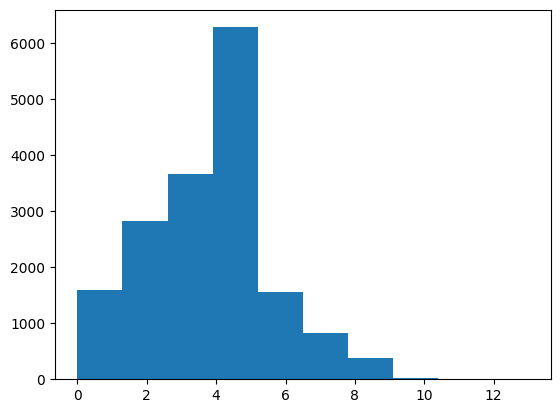

In [39]:
plt.hist(df.drop(columns=['Composer', 'Artist']).isnull().sum(axis=1))

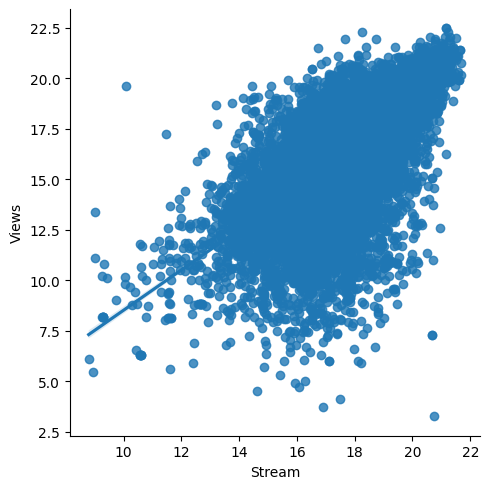

In [40]:
log_stream_view = np.log(df[['Views', 'Stream']])
log_stream_view = log_stream_view.dropna()
stream_view = df[['Views', 'Stream']]
stream_view = stream_view.dropna()
sns.lmplot(data=log_stream_view, x='Stream', y='Views')

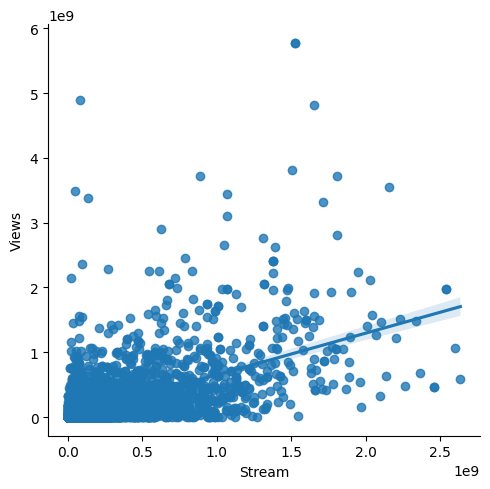

In [41]:
sns.lmplot(data=stream_view, x='Stream', y='Views')

In [42]:
from sklearn.linear_model import LinearRegression
lregressor = LinearRegression()
l_x = log_stream_view.Stream.values.reshape(log_stream_view.shape[0], 1)
l_y = log_stream_view.Views.values.reshape(log_stream_view.shape[0], 1)
lregressor.fit(l_x, l_y)
print(f'log(Views) = {lregressor.coef_[0,0]}*log(Stream){lregressor.intercept_[0]}')

log(Views) = 0.9976674788281573*log(Stream)-1.4620444463794158


The relation between Views and Stream is considered to be first order since the log coefficeint is almost one. 

In [43]:
l_x = stream_view.Stream.values.reshape(stream_view.shape[0], 1)
l_y = stream_view.Views.values.reshape(stream_view.shape[0], 1)
lregressor.fit(l_x, l_y)
print(f'Views = {lregressor.coef_[0,0]}*Stream + {lregressor.intercept_[0]}')

Views = 0.6448289254110858*Stream + 5391522.305247828


In [44]:
df['Views'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17170 entries, 0 to 17169
Series name: Views
Non-Null Count  Dtype  
--------------  -----  
14574 non-null  float64
dtypes: float64(1)
memory usage: 134.3 KB


In [45]:
df['Views'].mask(df['Views'].isna(), lregressor.coef_[0,0]*df['Stream']+lregressor.intercept_[0]).info()

<class 'pandas.core.series.Series'>
RangeIndex: 17170 entries, 0 to 17169
Series name: Views
Non-Null Count  Dtype  
--------------  -----  
16763 non-null  float64
dtypes: float64(1)
memory usage: 134.3 KB


In [46]:
df['Views'] = df['Views'].mask(df['Views'].isna(), df['Stream']*lregressor.coef_[0,0] + lregressor.intercept_[0])  # change to linear
df['Likes'] = df['Likes']/df['Views']
df = df.rename(columns={'Likes': 'Like_rate'})

In [47]:
fill_columns = [
    'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 
    'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
    'Duration_ms', 'Views', 'Like_rate']
df[fill_columns] = df[fill_columns].fillna(df[fill_columns].median())

In [48]:
df['Artist'] = df['Artist'].fillna('missing')
df['Composer'] = df['Composer'].fillna('missing')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17170 entries, 0 to 17169
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Danceability      17170 non-null  float64
 1   Energy            17170 non-null  float64
 2   Key               17170 non-null  float64
 3   Loudness          17170 non-null  float64
 4   Speechiness       17170 non-null  float64
 5   Acousticness      17170 non-null  float64
 6   Instrumentalness  17170 non-null  float64
 7   Liveness          17170 non-null  float64
 8   Valence           17170 non-null  float64
 9   Tempo             17170 non-null  float64
 10  Duration_ms       17170 non-null  float64
 11  Views             17170 non-null  float64
 12  Like_rate         17170 non-null  float64
 13  Stream            14602 non-null  float64
 14  Album_type        14610 non-null  object 
 15  Licensed          14577 non-null  object 
 16  official_video    14555 non-null  object

In [50]:
del l_x
del l_y
del stream_view
del log_stream_view

## Drop uncorrelated features


In [51]:
drop_columns = [
    'Stream', 'Album_type', 'Licensed', 'official_video',
    'id', 'Track', 'Album', 'Uri', 'Url_spotify', 'Url_youtube', 
    'Comments', 'Description', 'Title', 'Channel']
df = df.drop(columns=drop_columns)

## ~~Re-scale following features: Duration_ms and Views~~
because some data points of test data are not positive 

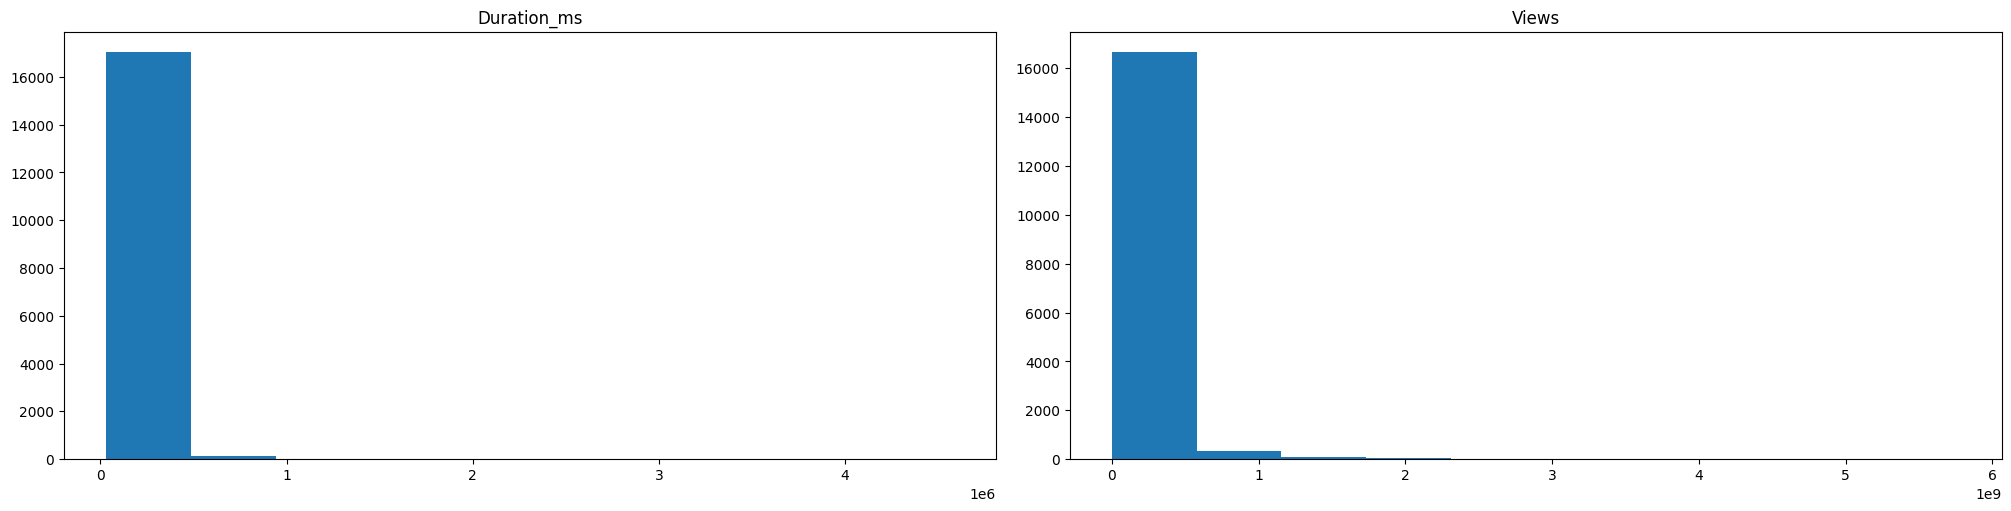

In [52]:
fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize=(20,5))
ax[0].set_title('Duration_ms')
ax[0].hist(df.Duration_ms)
ax[1].set_title('Views')
ax[1].hist(df.Views)
plt.show()

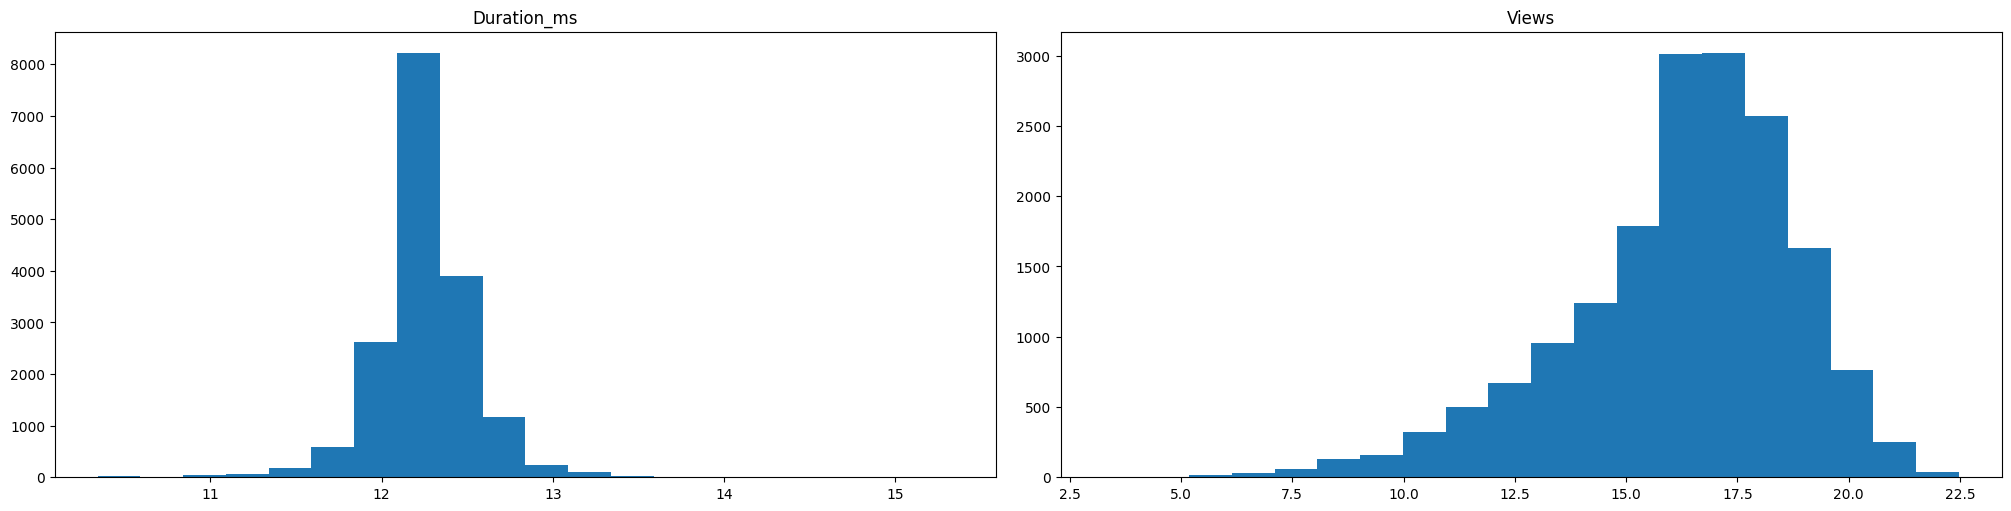

In [53]:
fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize=(20,5))
ax[0].set_title('Duration_ms')
ax[0].hist(np.log(df.Duration_ms), bins=20)
ax[1].set_title('Views')
ax[1].hist(np.log(df.Views), bins=20)
plt.show()

In [54]:
# df['Duration_ms'] = np.log(df['Duration_ms'])
# df['Views'] = np.log(df['Views'])
# df = df.rename({'Duration_ms': 'log_Duration_ms', 'Views': 'log_Views'})

## Analyze the correlation across features

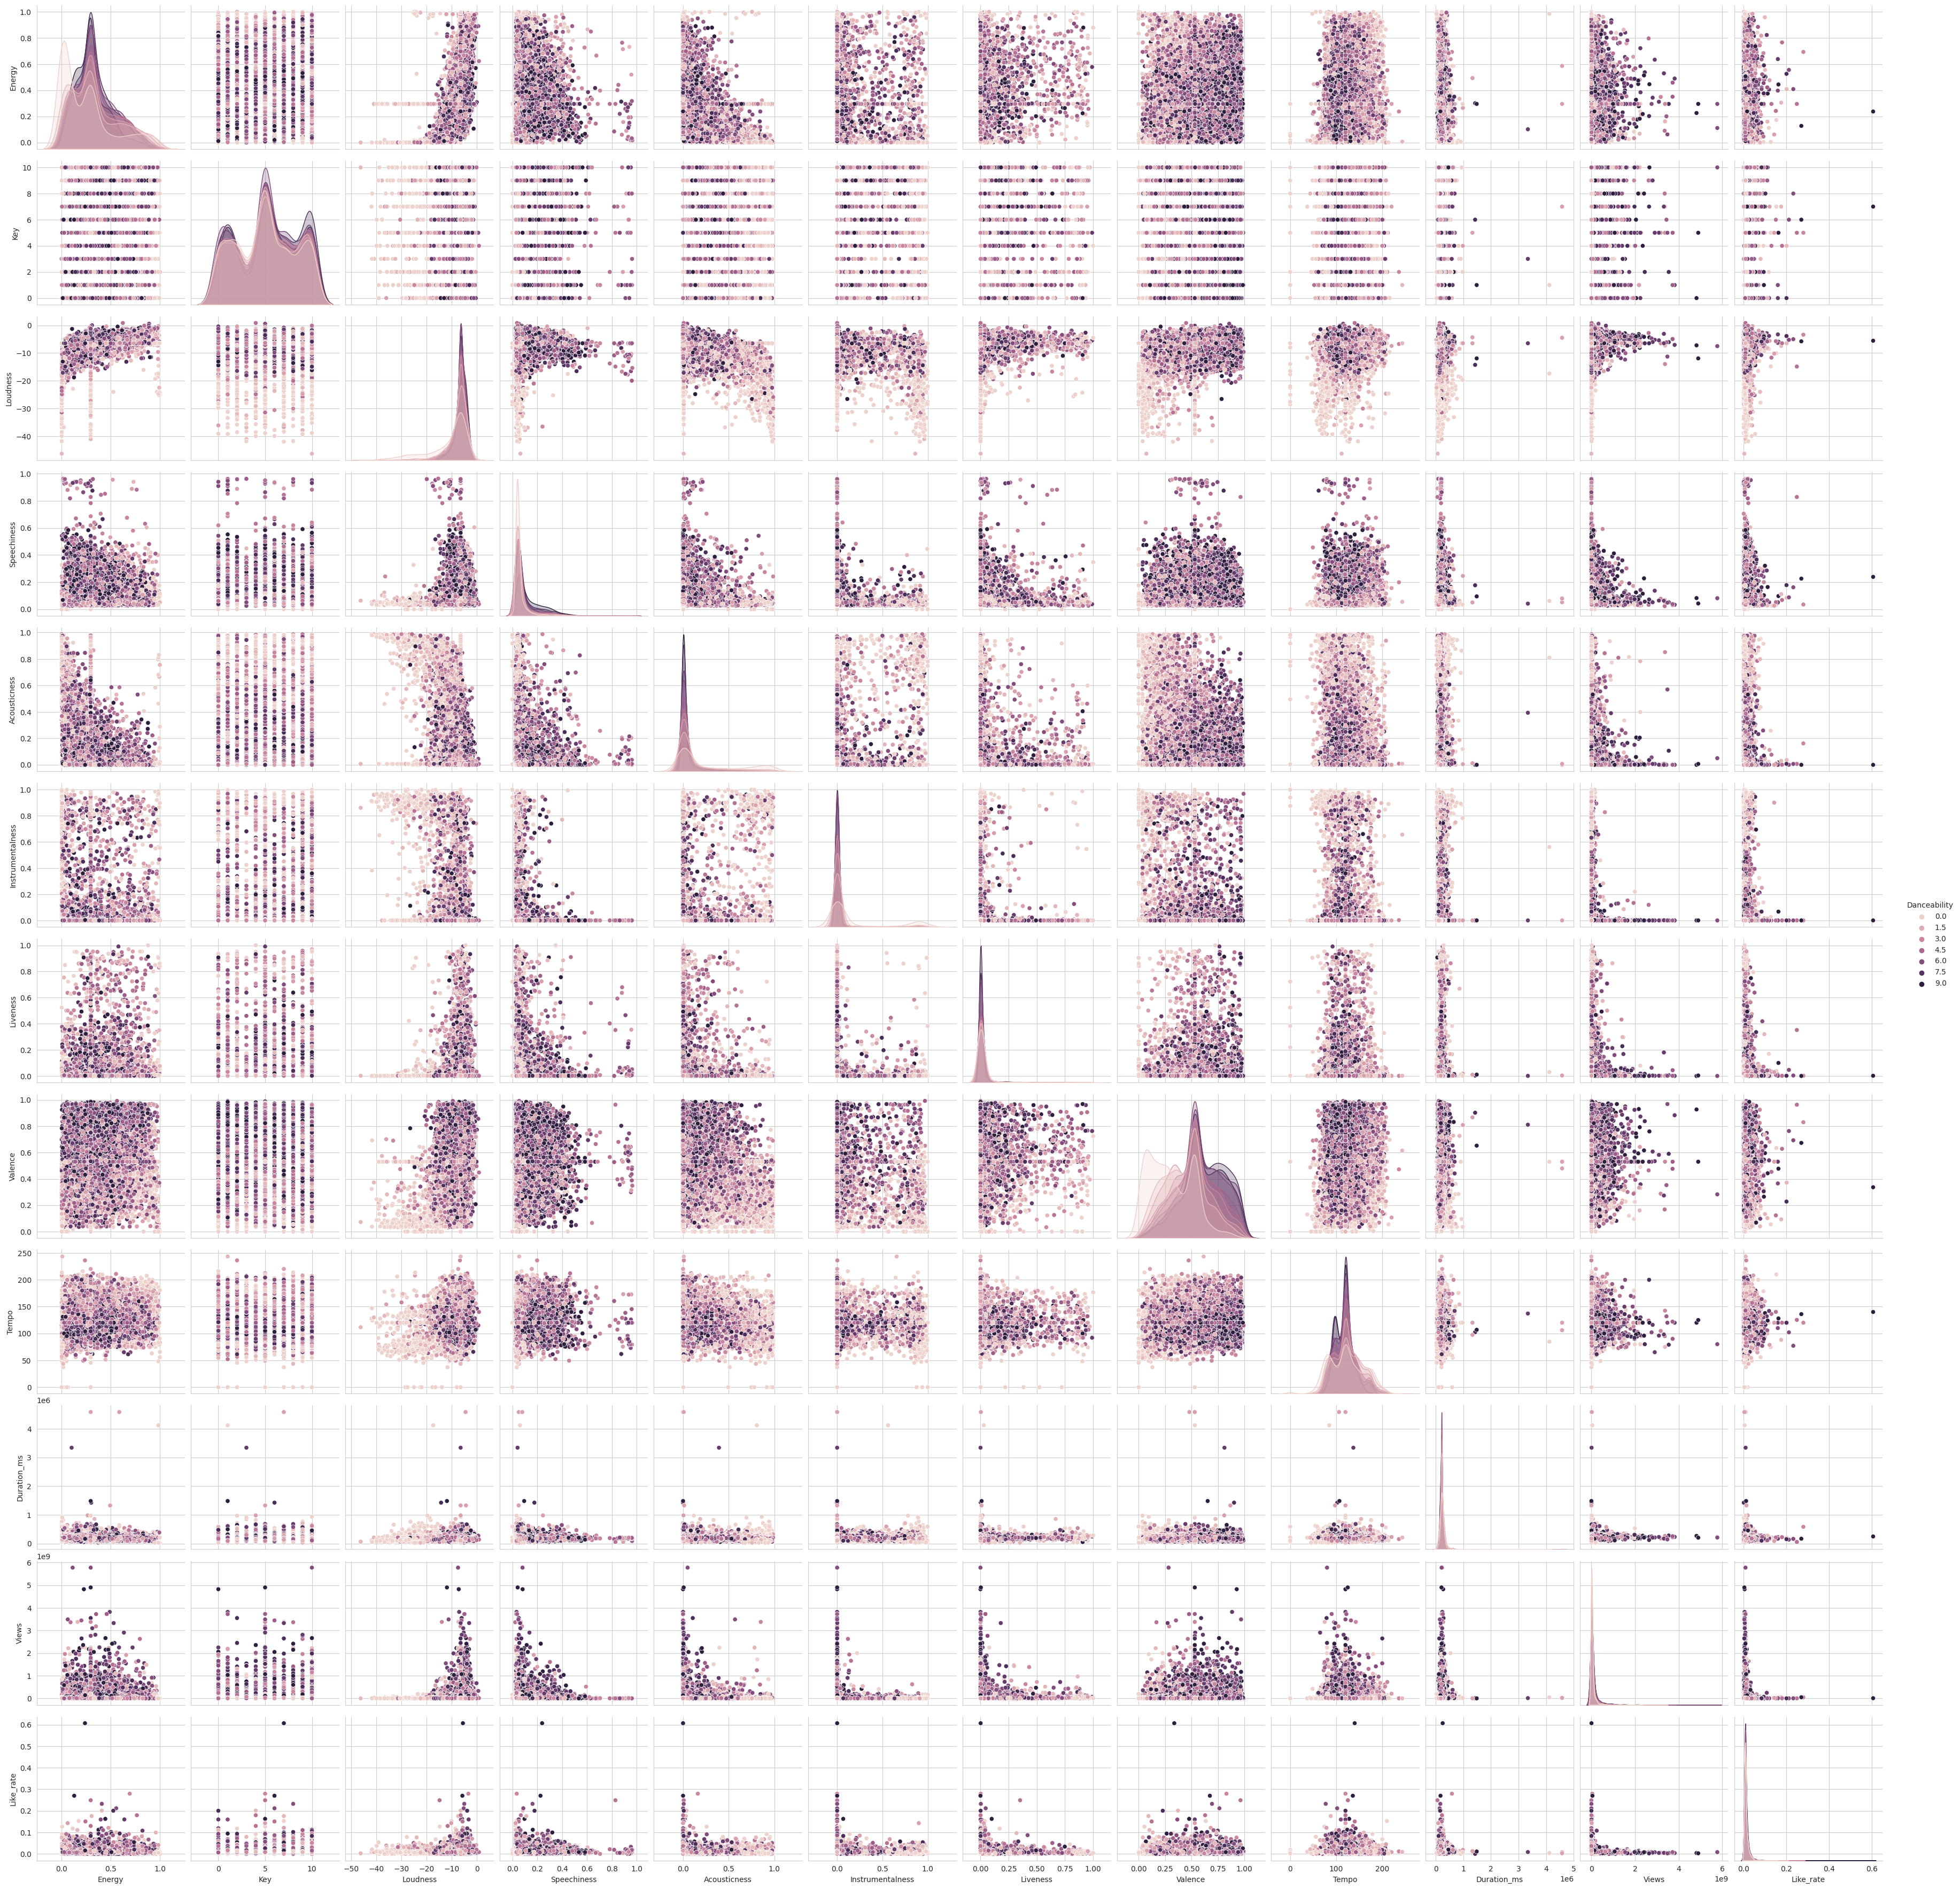

In [55]:
numericaldf = df.iloc[:,0:13].copy()
sns.set_style('whitegrid');
sns.pairplot(numericaldf, hue='Danceability', height=3);
plt.show()

In [59]:
corr = numericaldf.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

<Axes: >

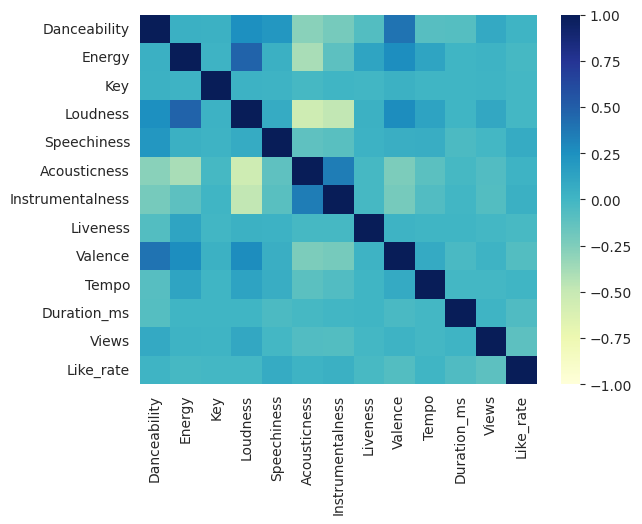

In [60]:
sns.heatmap(corr, 
            vmin = -1,
            vmax = 1,
            center = 0,
            cmap =  "YlGnBu",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [61]:
del numericaldf

## ~~Categorize the Key feature~~
bad performance

In [ ]:
# df.Key.unique()

array([ 3.,  7.,  6.,  5., 10.,  1.,  2.,  0.,  4.,  8.,  9.])

In [ ]:
# df = pd.get_dummies(df, prefix='Key', prefix_sep='_', columns=['Key'], drop_first=True)

## Categorize artists and composers
There are only 10 composers and 94 artists in the dataset.
In another experiment, I categorized all 10 composers and ran xgbregressor on those features. I found out that only two composers, Terrace Martin and Ludwig Göransson, are significantly affect danceability. In this chapter, I will use linear regression to demonstrate why are these two composers important.  

### analyze the importance of each artist and composer 

In [62]:
df['Artist'].value_counts()

missing                2566
Sufjan Stevens          763
Billie Eilish           692
Marshmello              519
deadmau5                510
                       ... 
LCD Soundsystem          10
Megan Thee Stallion      10
Harry Styles              7
John Legend               7
Father John Misty         2
Name: Artist, Length: 97, dtype: int64

In [63]:
top10artist = df['Artist'].value_counts().index[0:10].tolist()
top10artist

['missing',
 'Sufjan Stevens',
 'Billie Eilish',
 'Marshmello',
 'deadmau5',
 'Flume',
 'Tyler, The Creator',
 'Shawn Mendes',
 'The Chainsmokers',
 'Anderson .Paak']

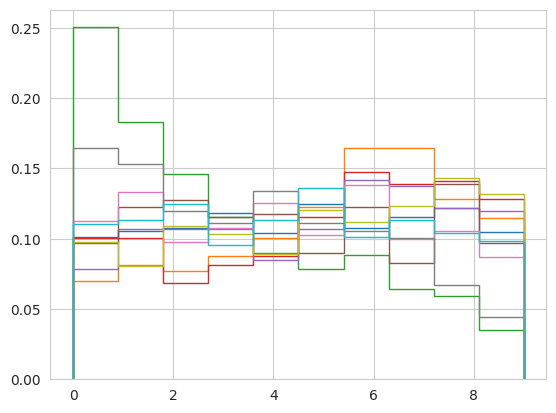

In [64]:
for i in top10artist:
  df[df['Artist']==i]['Danceability'].hist(density=True, histtype=u'step')

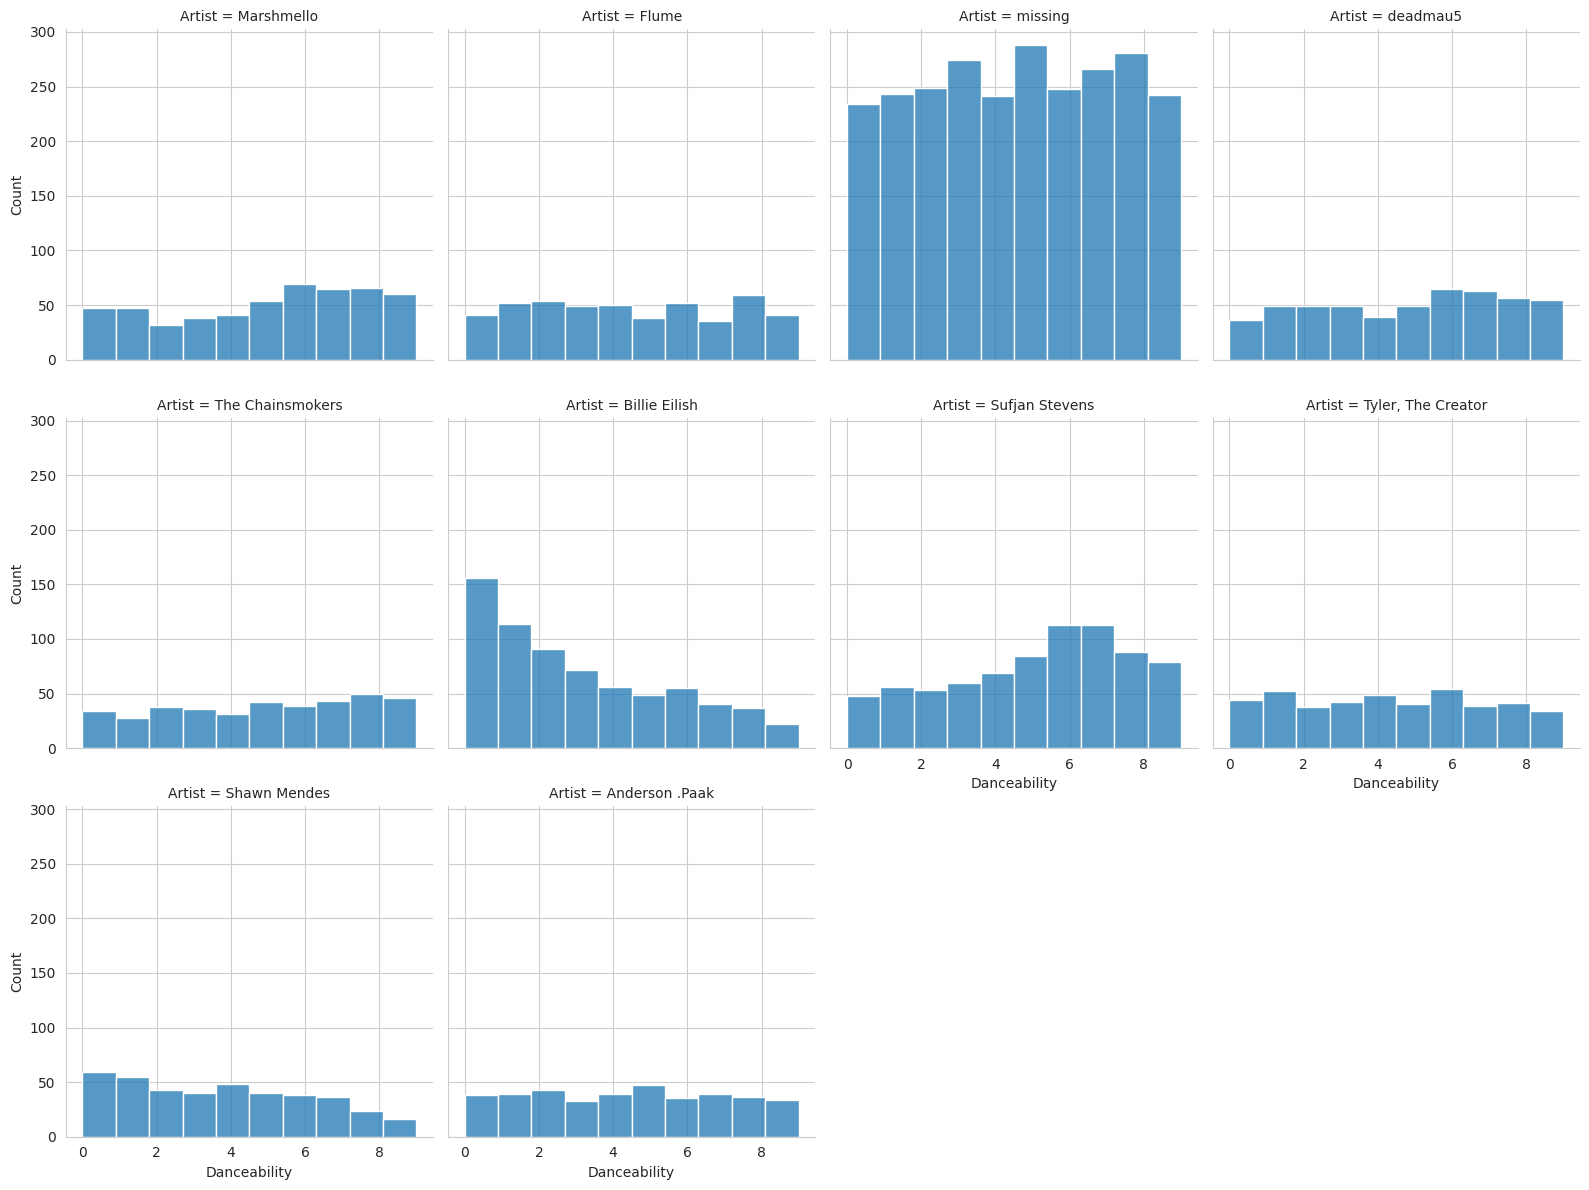

In [65]:
g = sns.displot(data=df[df['Artist'].isin(top10artist)], x='Danceability', col='Artist', col_wrap=4, height=4, common_bins=True, bins=10)

In [66]:
artist_rsquare = pd.DataFrame(columns=['artist', 'R^2', 'counts'])
from sklearn.linear_model import LinearRegression
aregressor = LinearRegression()
for i in df['Artist'].unique():
  df_a = df[df['Artist'] == i]
  X_a = df_a.drop(columns = ['Danceability', 'Composer', 'Artist']) 
  y_a = df_a.Danceability.values.reshape(df_a.shape[0], 1)
  aregressor.fit(X_a, y_a)
  new_row = {'artist': i, 'R^2': round(aregressor.score(X_a, y_a), 4), 'counts': df_a.shape[0]}
  artist_rsquare = artist_rsquare.append(new_row, ignore_index=True)

In [67]:
artist_rsquare.head()

artist     R^2 counts
0         Marshmello  0.2886    519
1           Bon Iver  0.3090    374
2  Kamasi Washington  0.2659    179
3              Drake  0.2878    164
4        Alicia Keys  0.3526    272

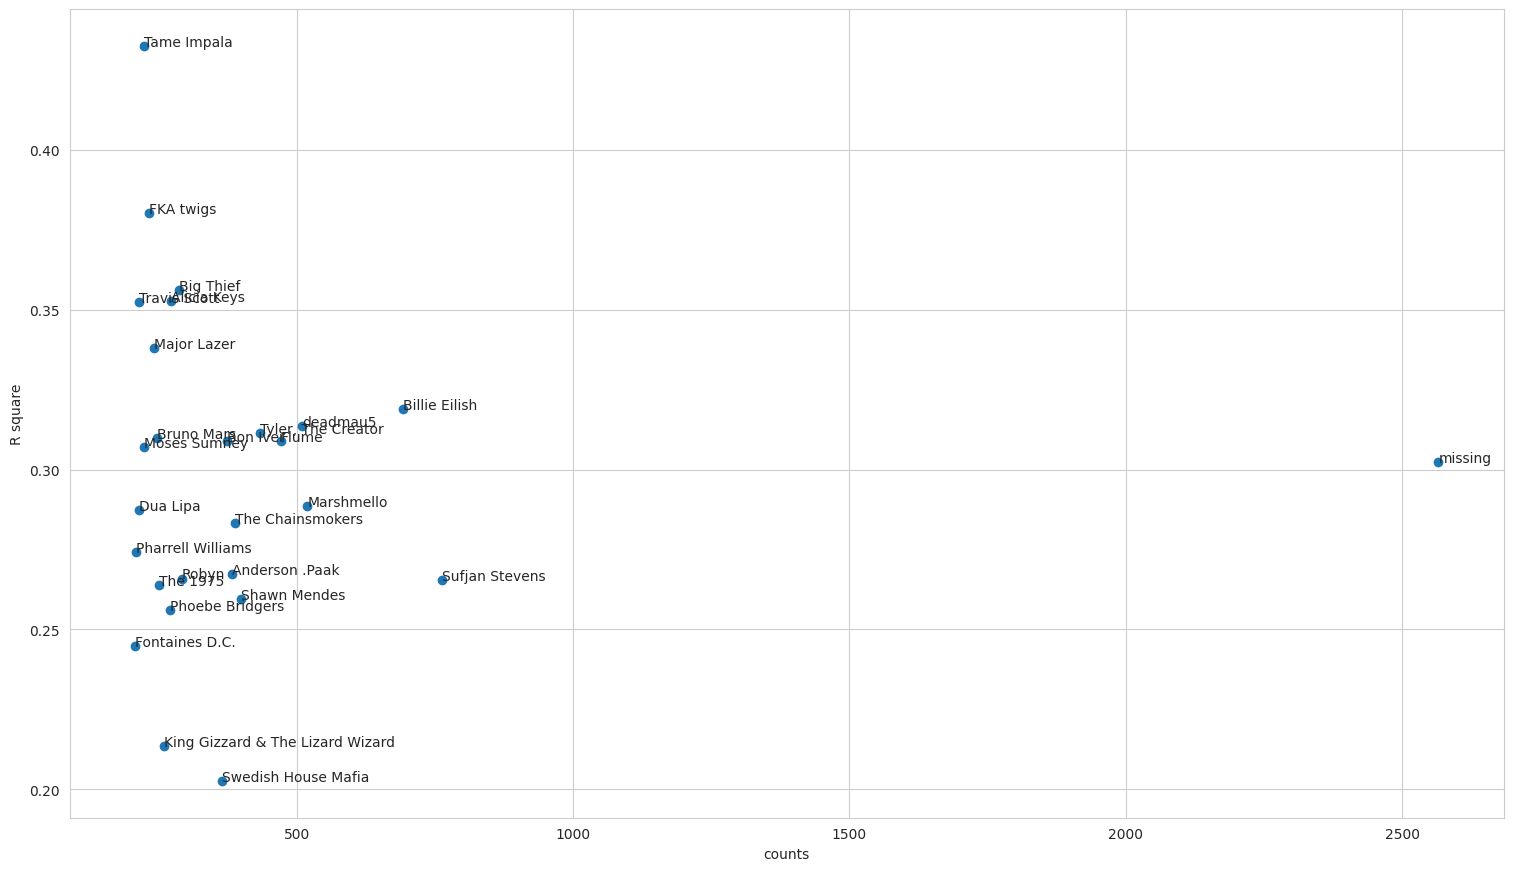

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5, forward=True)
z = artist_rsquare[artist_rsquare.counts>=200]['counts'].tolist()
y = artist_rsquare[artist_rsquare.counts>=200]['R^2'].tolist()
n = artist_rsquare[artist_rsquare.counts>=200]['artist'].tolist()
ax.scatter(z, y)
ax.set_xlabel('counts')
ax.set_ylabel('R square')
for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

In [69]:
df['Composer'].value_counts()

Finneas O'Connell    3009
missing              2558
Terrace Martin       2536
Louis Bell           2107
Juicy J              1874
Yeti Beats           1559
Ludwig Göransson     1230
Mike Dean            1153
Noah "40" Shebib      929
Ricky Reed            134
J. Cole                81
Name: Composer, dtype: int64

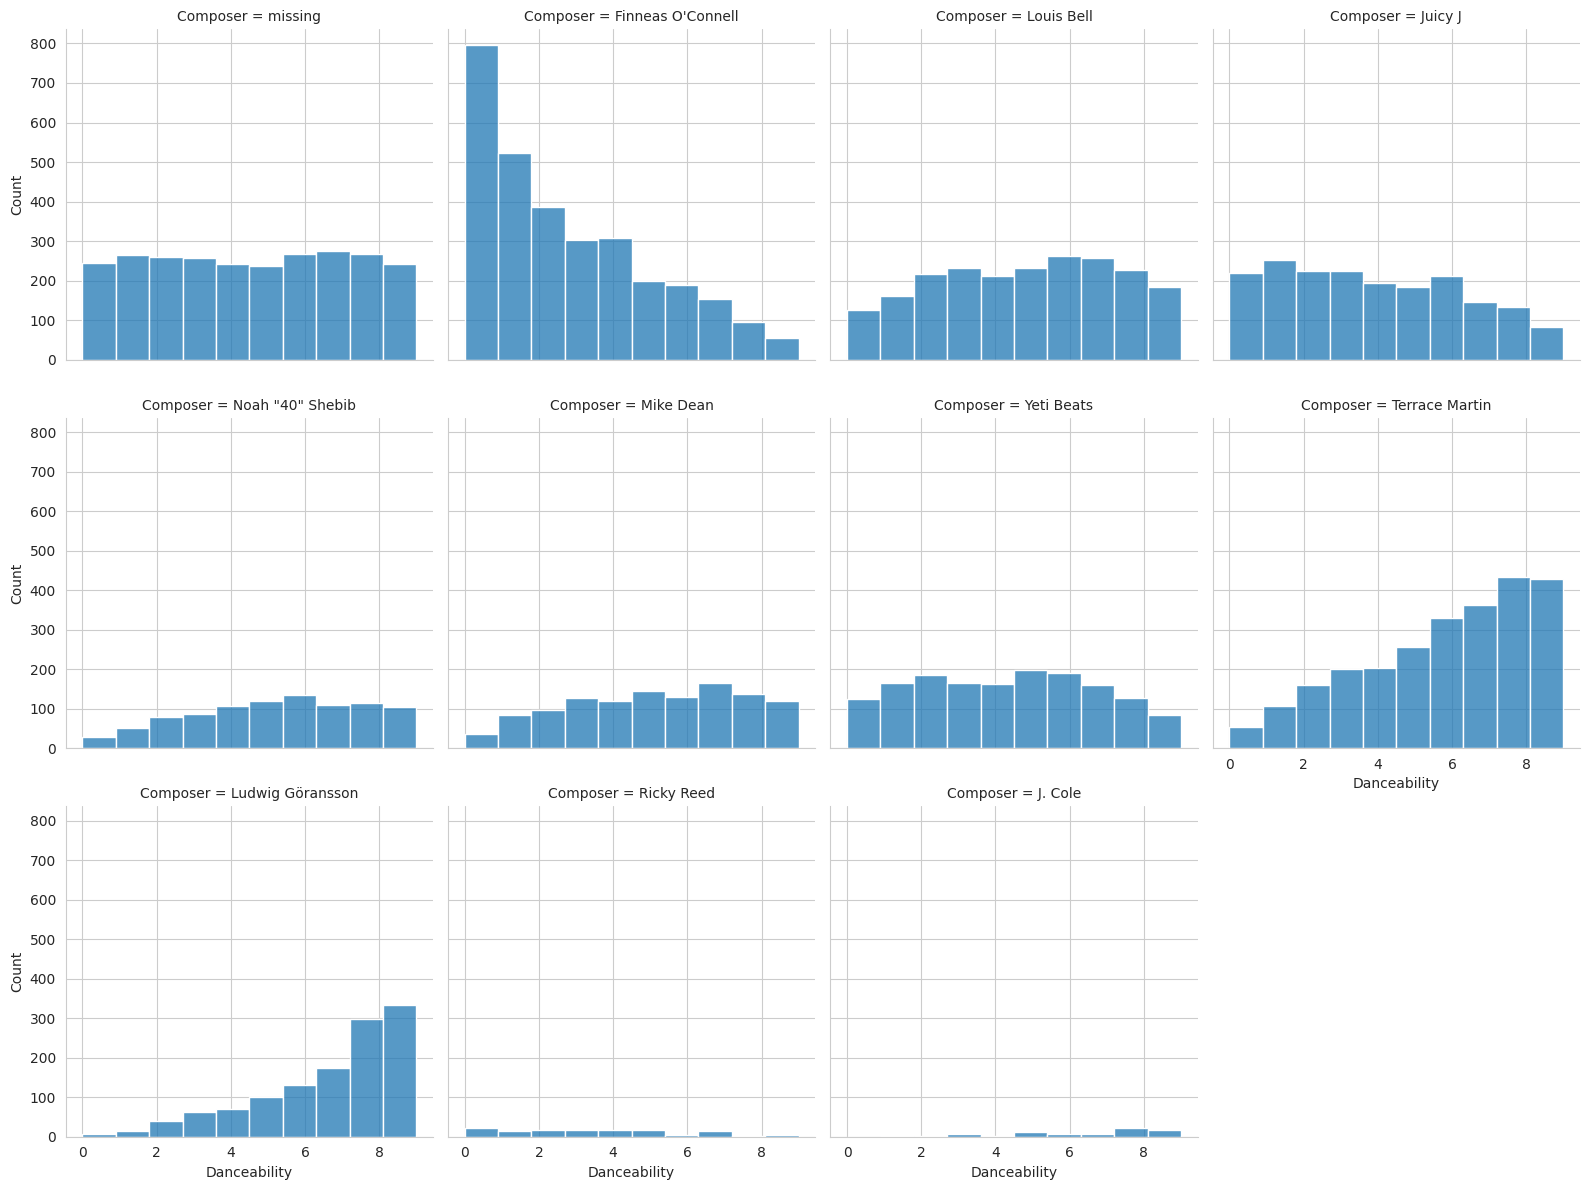

In [70]:
g = sns.displot(data=df, x='Danceability', col='Composer', col_wrap=4, height=4, common_bins=True, bins=10)

In [71]:
composer_rsquare = pd.DataFrame(columns=['composer', 'R^2', 'counts'])
from sklearn.linear_model import LinearRegression
cregressor = LinearRegression()
for i in df['Composer'].unique():
  df_c = df[df['Composer'] == i]
  X_c = df_c.drop(columns = ['Danceability', 'Composer', 'Artist']) 
  y_c = df_c.Danceability.values.reshape(df_c.shape[0], 1)
  cregressor.fit(X_c, y_c)
  new_row = {'composer': i, 'R^2': round(cregressor.score(X_c, y_c), 4), 'counts': df_c.shape[0]}
  composer_rsquare = composer_rsquare.append(new_row, ignore_index=True)
  # print(i,'\n' ,'(1)R square is', round(cregressor.score(X_c, y_c), 4), '(2)number of songs is', df_c.shape[0])
composer_rsquare.head()

composer     R^2 counts
0            missing  0.2754   2558
1  Finneas O'Connell  0.2764   3009
2         Louis Bell  0.2544   2107
3            Juicy J  0.2586   1874
4   Noah "40" Shebib  0.2264    929

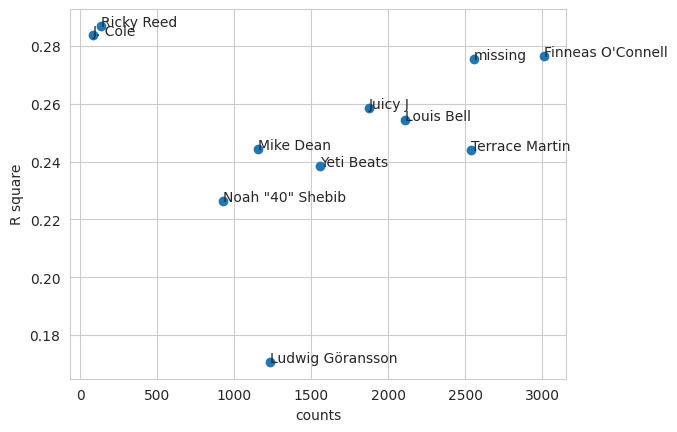

In [72]:
fig, ax = plt.subplots()
z = composer_rsquare['counts'].tolist()
y = composer_rsquare['R^2'].tolist()
n = composer_rsquare['composer'].tolist()
ax.scatter(z, y)
ax.set_xlabel('counts')
ax.set_ylabel('R square')
for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

### drop artist

In [74]:
import copy
artist_to_drop = copy.copy(df.Artist.unique().tolist())

In [75]:
artist_to_drop.remove('missing')
artist_to_drop.remove('Sufjan Stevens')
artist_to_drop.remove('Swedish House Mafia')
artist_to_drop.remove('King Gizzard & The Lizard Wizard')
artist_to_drop.remove('A$AP Rocky')

In [76]:
df = pd.get_dummies(df, prefix='', prefix_sep='', columns=['Artist'], drop_first=True)

In [77]:
df = df.assign(Artist_others = lambda x: 1 - x['missing'] - x['Sufjan Stevens'] - 
               x['Swedish House Mafia'] - x['King Gizzard & The Lizard Wizard'])

In [78]:
df = df.drop(columns=artist_to_drop)

### drop composer

This explains why the graph below shows that xgboost scores Ludwig Göransson and Terrace Martin the most because they have many songs listed and their songs are hardly evaluted by other features (R square are relatively low).

In [79]:
df = pd.get_dummies(df, prefix='Composer', prefix_sep='_', columns=['Composer'], drop_first=True)

In [80]:
df.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Like_rate', 'King Gizzard & The Lizard Wizard',
       'Sufjan Stevens', 'Swedish House Mafia', 'missing', 'Artist_others',
       'Composer_J. Cole', 'Composer_Juicy J', 'Composer_Louis Bell',
       'Composer_Ludwig Göransson', 'Composer_Mike Dean',
       'Composer_Noah "40" Shebib', 'Composer_Ricky Reed',
       'Composer_Terrace Martin', 'Composer_Yeti Beats', 'Composer_missing'],
      dtype='object')

from the data we observe, some of the composers are not important

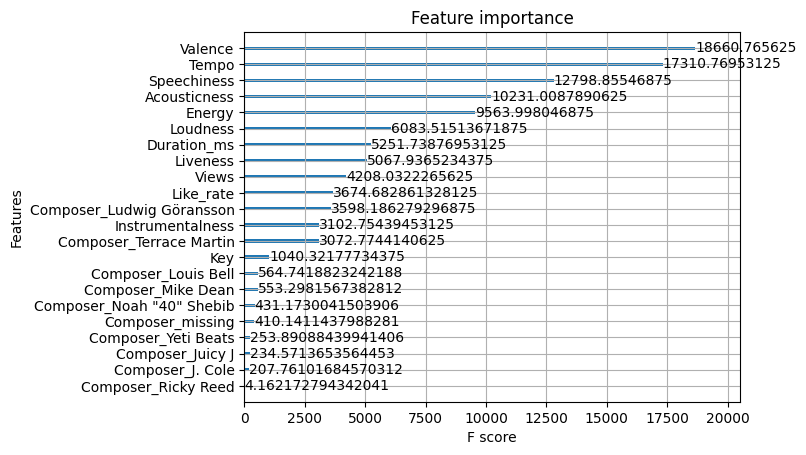

In [81]:
composer_to_drop = ['Composer_J. Cole',
       'Composer_Juicy J', 'Composer_Louis Bell',
       'Composer_Mike Dean', 'Composer_Noah "40" Shebib',
       'Composer_Ricky Reed', 'Composer_Yeti Beats',]
df = df.assign(Composer_others = lambda x: 1 - x['Composer_Terrace Martin'] - x['Composer_Ludwig Göransson']- x['Composer_missing'])

In [82]:
df = df.drop(columns=composer_to_drop)

# Training and Cross Validation

## Training testing data split


In [87]:
X = df.drop(columns=['Danceability'])  #, 'Instrumentalness' , 'Artist', 'Key'
y = df['Danceability']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8)

## Fit XGB classifier 

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.0 MB/s eta 0:00:00


In [ ]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators = [
    ('encoder', TargetEncoder()),
    ('clf', XGBClassifier(objective='multi:softmax', random_state=8, num_class=10, n_jobs=-1, colsample_bylevel=0.9, colsample_bynode=0.95,
                colsample_bytree=0.65, learning_rate=0.1, gamma=0, n_estimators=200, verbose=0)) 
    # can customize objective function with the objective parameter which is used to find error_in
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.9, colsample_bynode=0.95,
                               colsample_bytree=0.65,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=-1, num_class=10, num_parallel_tree=None,
                               objective='multi:softmax', ...))])

In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(3, 10),
    'clf__min_child_weight': Integer(10, 20),
    # 'clf__learning_rate': Real(0.001, 0.1, prior='log-uniform'),
    # 'clf__subsample': Real(0.5, 1.0),
    'clf__alpha': Real(0.0, 15.0),
    # 'clf__gamma': Real(0.0, 10.0)
}


opt = BayesSearchCV(pipe, search_space, cv=5, n_iter=20, random_state=8, verbose=0)   
# change scoring to change loss function in case we want to use scoring=sklearn.metrics.mean_absolute_error
# n_iter should be larger (100~500)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                        ('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=0.9,
                                                       colsample_bynode=0.95,
                                                       colsample_bytree=0.65,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=0, gpu_id=None,
                                                       grow_policy=None,
                                                       importance_type=None,...
                                                       n_jobs=-1, num_class=10,
                                                       num_parallel_tree=None,
                                                       objective='multi:softmax', ...))]),
              n_iter=20, random_state=8,
              search_spaces={'clf__alpha': Real(low=0.0, high=15.0, prior='uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'clf__min_child_weight': Integer(low=10, high=20, prior='uniform', transform='normalize')})

In [ ]:
opt.best_estimator_

Pipeline(steps=[('encoder', TargetEncoder(cols=[])),
                ('clf',
                 XGBClassifier(alpha=3.0336700701320893, base_score=None,
                               booster=None, callbacks=None,
                               colsample_bylevel=0.9, colsample_bynode=0.95,
                               colsample_bytree=0.65,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=10, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=-1, num_class=10, num_parallel_tree=None, ...))])

In [ ]:
opt.best_score_

0.2724225289570891

In [ ]:
opt.score(X_test, y_test)

0.2833430401863716

In [ ]:
opt.predict(X_test)

array([2, 8, 1, ..., 7, 8, 4], dtype=int32)

In [ ]:
opt.predict_proba(X_test)

array([[0.02654532, 0.1255951 , 0.1399847 , ..., 0.13365225, 0.13566601,
        0.08343088],
       [0.00244089, 0.01859044, 0.01613325, ..., 0.107727  , 0.4615605 ,
        0.2670463 ],
       [0.05562076, 0.6073452 , 0.05337626, ..., 0.01356607, 0.01100921,
        0.01467973],
       ...,
       [0.00666636, 0.01378223, 0.0283367 , ..., 0.34544754, 0.20385432,
        0.02052148],
       [0.00072067, 0.00373388, 0.00687596, ..., 0.04439428, 0.51024413,
        0.28170657],
       [0.00813813, 0.03262918, 0.05461476, ..., 0.18112694, 0.07081895,
        0.11931598]], dtype=float32)

In [ ]:
opt.best_estimator_.steps

[('encoder', TargetEncoder(cols=[])),
 ('clf',
  XGBClassifier(alpha=3.0336700701320893, base_score=None, booster=None,
                callbacks=None, colsample_bylevel=0.9, colsample_bynode=0.95,
                colsample_bytree=0.65, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=10, max_leaves=None,
                min_child_weight=10, missing=nan, monotone_constraints=None,
                n_estimators=200, n_jobs=-1, num_class=10, num_parallel_tree=None, ...))]

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

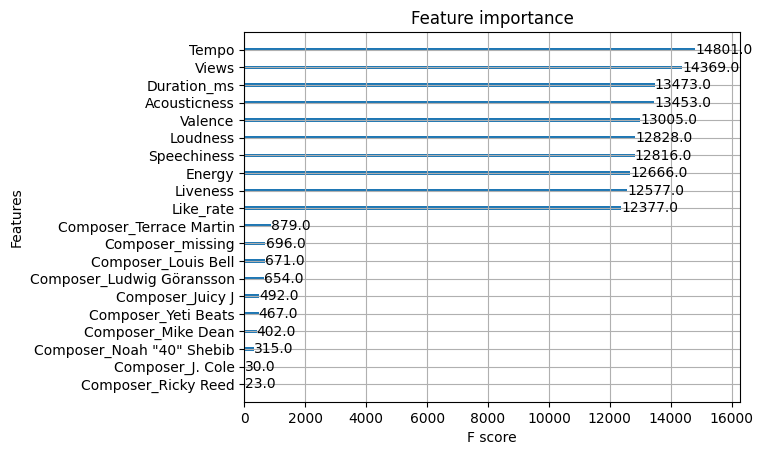

In [ ]:
from xgboost import plot_importance

xgboost_step = opt.best_estimator_.steps[1]
xgboost_model = xgboost_step[1]
plot_importance(xgboost_model)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

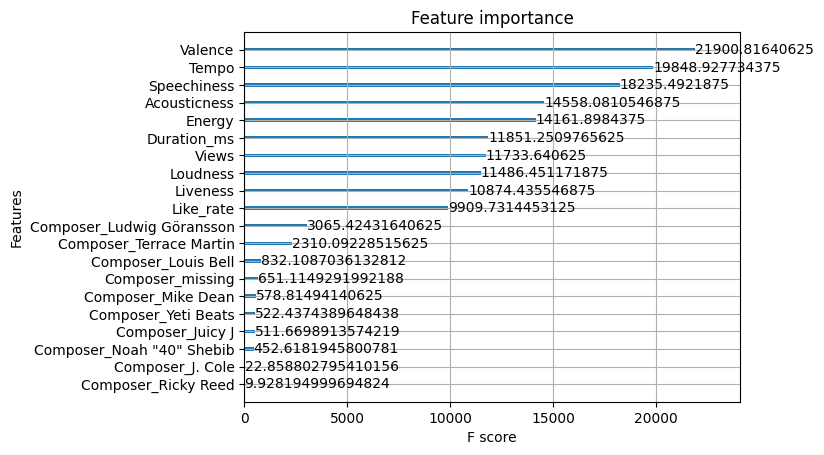

In [ ]:
plot_importance(xgboost_model, importance_type='total_gain')

In [ ]:
opt.best_estimator_.steps[1][1]

XGBClassifier(alpha=3.0336700701320893, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=0.9, colsample_bynode=0.95,
              colsample_bytree=0.65, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_class=10, num_parallel_tree=None, ...)

In [ ]:
np.absolute(opt.predict(X_test)-y_test).mean()

1.7341292952824694

In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]
xgboost_model.fit(X_train, y_train, eval_metric="aucpr", eval_set=eval_set, verbose=False)

XGBClassifier(alpha=3.0336700701320893, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=0.9, colsample_bynode=0.95,
              colsample_bytree=0.65, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_class=10, num_parallel_tree=None, ...)

In [ ]:
results = xgboost_model.evals_result()
train_error = results['validation_0']['aucpr']
test_error = results['validation_1']['aucpr']
num_iterations = len(train_error)

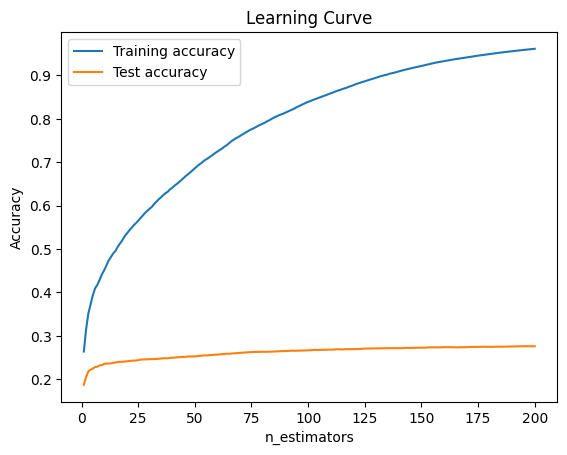

In [ ]:
plt.plot(range(1, num_iterations+1), train_error, label='Training accuracy')
plt.plot(range(1, num_iterations+1), test_error, label='Test accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

## Fit XGB regressor

In [89]:
!pip install category_encoders
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 2.9 MB/s eta 0:00:00


In [94]:
estimators = [
    ('encoder', TargetEncoder()),
    ('clf', XGBRegressor(objective='reg:absoluteerror', colsample_bylevel=0.7, colsample_bynode=0.9093339514705211,
               colsample_bytree=0.8, random_state=8, n_jobs=-1, eval_metric='mae', n_estimators=100, gamma=9.11,
               learning_rate=0.1, max_depth=32))
    # can customize objective function with the objective parameter which is used to find error_in
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=0.7,
                              colsample_bynode=0.9093339514705211,
                              colsample_bytree=0.8, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric='mae',
                              feature_types=None, gamma=9.11, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=32, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=-1, num_parallel_tree=None,
                              objective='reg:absoluteerror', predictor=None, ...))])

In [95]:
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
search_space = {
    # 'clf__max_depth': Integer(15, 40),
    # 'clf__colsample_bylevel': Real(0.5, 1.0), 
    # 'clf__colsample_bynode': Real(0.9, 1.0),
    # 'clf__colsample_bytree': Real(0.8, 1.0), 
    'clf__min_child_weight': Integer(35, 50),
    # 'clf__n_estimators': Integer(100, 500), best is around 250 after training
    # 'clf__learning_rate': Real(0.05, 0.40, prior='log-uniform'),
    # 'clf__subsample': Real(0.5, 1.0),
    # 'clf__alpha': Real(0.0, 10.0), is 0 after training
    # 'clf__gamma': Real(0.0, 20.0)
}

opt_reg = BayesSearchCV(pipe, search_space, cv=5, n_iter=10, random_state=8, scoring='neg_mean_absolute_error', verbose=False)

In [ ]:
# opt_reg = XGBRegressor(base_score=None, booster=None, callbacks=None,
#                colsample_bylevel=0.7, colsample_bynode=0.9093339514705211,
#                colsample_bytree=0.8, early_stopping_rounds=None,
#                enable_categorical=False, eval_metric='mae', feature_types=None,
#                gamma=9.113401021650647, gpu_id=None, grow_policy=None,
#                importance_type=None, interaction_constraints=None,
#                learning_rate=0.1, max_bin=None, max_cat_threshold=None,
#                max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
#                max_leaves=None, min_child_weight=40,
#                monotone_constraints=None, n_estimators=300, n_jobs=-1,
#                num_parallel_tree=None, objective='reg:absoluteerror')      best predictor so far with key and all composers

In [102]:
%%capture  # to be silence
opt_reg.fit(X_train, y_train)

In [103]:
opt_reg.best_score_

-1.634832524712603

In [104]:
opt_reg.score(X_test, y_test)  # is mean absolute error

-1.6318442096180312

In [105]:
opt_reg.predict(X_test)

array([6.147395 , 7.7840724, 1.847632 , ..., 6.3009768, 8.160514 ,
       6.045754 ], dtype=float32)

In [106]:
opt_reg.best_estimator_.steps

[('encoder', TargetEncoder(cols=[])),
 ('clf',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=0.7, colsample_bynode=0.9093339514705211,
               colsample_bytree=0.8, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='mae', feature_types=None,
               gamma=9.11, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=32, max_leaves=None,
               min_child_weight=36, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=-1, num_parallel_tree=None,
               objective='reg:absoluteerror', predictor=None, ...))]

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

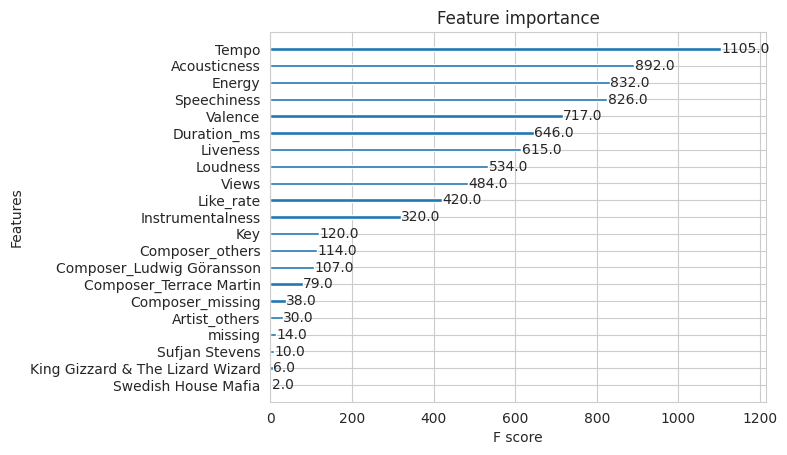

In [107]:
from xgboost import plot_importance

xgboost_step = opt_reg.best_estimator_.steps[1]
xgboost_model = xgboost_step[1]
plot_importance(xgboost_model)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

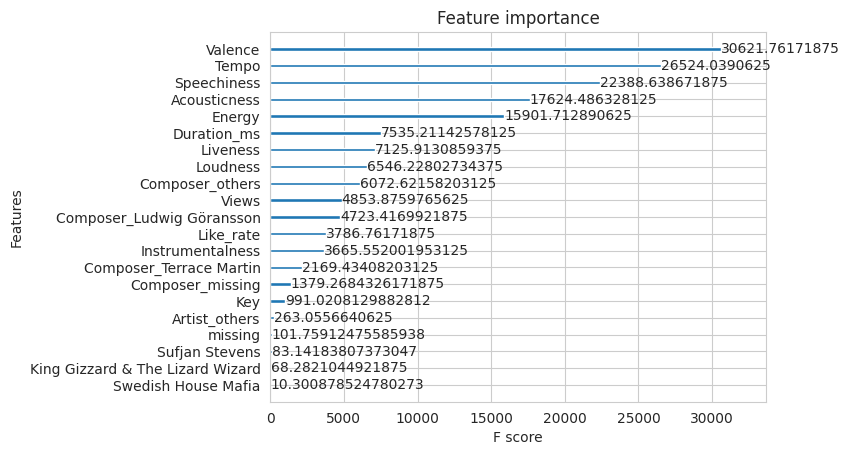

In [108]:
plot_importance(xgboost_model, importance_type='total_gain')

In [109]:
np.absolute(opt_reg.predict(X_test)-y_test).mean()

1.6318442096180312

In [110]:
np.absolute(np.round(opt_reg.predict(X_test))-y_test).mean()

1.618811881188119

In [111]:
eval_set = [(X_train, y_train), (X_test, y_test)]
xgboost_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=0.9093339514705211,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=9.11, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=32, max_leaves=None,
             min_child_weight=36, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             objective='reg:absoluteerror', predictor=None, ...)

In [112]:
results = xgboost_model.evals_result()
train_error = results['validation_0']['mae']
test_error = results['validation_1']['mae']
num_iterations = len(train_error)

In [113]:
test_error.index(min(test_error))  # the better n_estimators

99

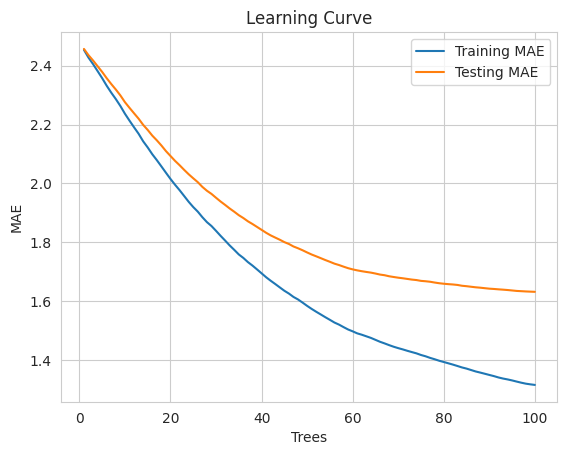

In [114]:
plt.plot(range(1, num_iterations+1), train_error, label='Training MAE')
plt.plot(range(1, num_iterations+1), test_error, label='Testing MAE')
plt.xlabel('Trees')
plt.ylabel('MAE')
plt.title('Learning Curve')
plt.legend()
plt.show()

## Find best n_estimators

In [115]:
import copy
model2 = copy.deepcopy(opt_reg.best_estimator_.steps[1][1])
model2.n_estimators = 1000  # test_error.index(min(test_error)) use the value min(test_error) a.k.a. the bottom of testing MAE curve
model2.fit(X_train, y_train, eval_set=eval_set, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=0.9093339514705211,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=9.11, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=32, max_leaves=None,
             min_child_weight=36, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             objective='reg:absoluteerror', predictor=None, ...)

In [117]:
results = model2.evals_result()
train_error = results['validation_0']['mae']
test_error = results['validation_1']['mae']
num_iterations = len(train_error)

In [118]:
results['validation_1']['mae'].index(min(results['validation_1']['mae']))

470

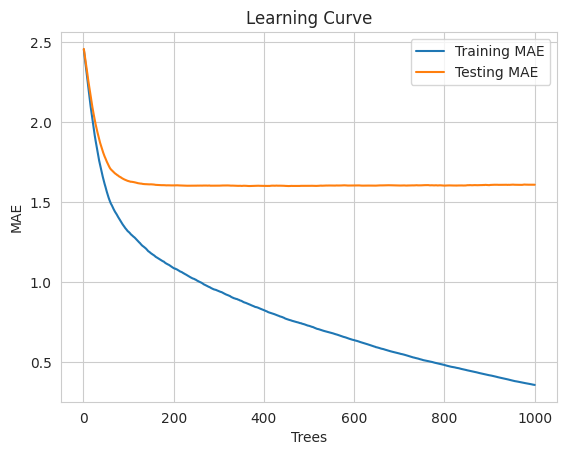

In [119]:
plt.plot(range(1, num_iterations+1), train_error, label='Training MAE')
plt.plot(range(1, num_iterations+1), test_error, label='Testing MAE')
plt.xlabel('Trees')
plt.ylabel('MAE')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [120]:
print('Mean absolute error:', np.absolute(model2.predict(X_test)-y_test).mean(),
      '\nRound mean absolute error:', np.absolute(np.round(model2.predict(X_test))-y_test).mean())

Mean absolute error: 1.6089487565080887 
Round mean absolute error: 1.586488060570763


# Prediction

## Testing data transform

In [121]:
drop_columns2 = filter(lambda x: x != 'id', drop_columns)
df_p = (
    pd.read_csv(url + 'test.csv')
    .assign(
        Views = lambda x: x.Views.mask(x['Views'].isna(), x.Stream*lregressor.coef_[0,0]+lregressor.intercept_[0]),
        Likes = lambda x: x.Likes/x.Views
    )
    .rename(columns={'Likes': 'Like_rate'})
    .drop(columns=drop_columns2)
)
df_p[fill_columns] = df_p[fill_columns].fillna(df_p[fill_columns].median())

In [122]:
df_p = (df_p
    # df_p.assign(
    #    Duration_ms = lambda x: np.log(x.Duration_ms),
    #    Views = lambda x: np.log(x.Views) 
    # )
    # .rename({'Duration_ms': 'log_Duration_ms', 'Views': 'log_Views'})
    .fillna({'Composer': 'missing', 'Artist': 'missing'})
)

In [123]:
df_p = pd.get_dummies(df_p, prefix='Composer', prefix_sep='_', columns=['Composer'], drop_first=True)
df_p = df_p.assign(Composer_others = lambda x: 1 - x['Composer_Terrace Martin'] - x['Composer_Ludwig Göransson']- x['Composer_missing'])
df_p = df_p.drop(columns=composer_to_drop)

In [124]:
X_p = df_p.drop(columns=['Artist', 'id', 'Key'])  #'Instrumentalness'

## predict with training data

In [ ]:
predict_value = opt_reg.predict(X_p)

In [ ]:
submission = pd.DataFrame(data = {'id': df_p.id, 'Danceability': predict_value})

In [ ]:
submission.to_csv(url + 'xgboost_reg_composer_category0508_tuned.csv', index=False)

## Refit all the data

In [ ]:
# model = opt_reg.best_estimator_.steps[1][1]
model2.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.7, colsample_bynode=0.9590887210789425,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=18.909747833288947, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.29999999999999993, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=39, missing=nan, monotone_constraints=None,
             n_estimators=12, n_jobs=-1, num_parallel_tree=None,
             objective='reg:absoluteerror', predictor=None, ...)

In [ ]:
predict_all = np.round(model2.predict(X_p))
submission_all = pd.DataFrame(data = {'id': df_p.id, 'Danceability': predict_all})
submission_all.to_csv(url + 'xgboost_reg_round_nolog_gpuhist.csv', index=False)